In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from gptomics import plot

ModuleNotFoundError: No module named 'gptomics'

In [12]:
sigmas = pd.read_csv(filepath_or_buffer="../sigmas.csv.gz", compression="gzip")

In [13]:
for subdf in sigmas:
  sigmas.size

In [14]:
sigmas.columns

Index(['Unnamed: 0', 'src_type', 'src_layer', 'src_index', 'dst_type',
       'dst_layer', 'dst_index', 'term_type', 'term_value', 'SV_index'],
      dtype='object')

In [18]:
mlp_sigmas = sigmas[sigmas['term_type']=='mlp']
Q_sigmas = sigmas[sigmas['term_type']=='Q']
K_sigmas = sigmas[sigmas['term_type']=='K']
V_sigmas = sigmas[sigmas['term_type']=='V']

In [19]:
sigmas.shape[0] - Q_sigmas.shape[0] - K_sigmas.shape[0] - V_sigmas.shape[0] - mlp_sigmas.shape[0]

0

In [20]:
Q_sigmas.shape


(662112, 10)

In [21]:
K_sigmas.shape


(662112, 10)

In [22]:
V_sigmas.shape

(662112, 10)

In [23]:
mlp_sigmas.shape

(110099, 10)

In [35]:
sorted_values = (lambda term_type : sigmas[sigmas['term_type'] == term_type].sort_values(), ['Q','K','V','mlp'])

In [51]:
mlp_sorted = mlp_sigmas.sort_values(by='term_value')

In [54]:
Q_sorted = Q_sigmas.sort_values(by='term_value')

In [53]:
K_sorted = K_sigmas.sort_values(by='term_value')

In [55]:
V_sorted = V_sigmas.sort_values(by='term_value')

We want to see what the size of a composition term is, and how much each composition term is dominated by a single vs multiple singular values

In [ ]:
def normalize(values) :
  return (values - values.mean())/values.std()

In [67]:
mlp = normalize(mlp_sorted['term_value'])
mlp

190581     -0.912855
1047060    -0.912855
793203     -0.912855
1269281    -0.912855
507710     -0.912855
             ...    
632718     27.715468
855451     27.909257
760543     27.918539
474538     29.803002
666406     32.234178
Name: term_value, Length: 110099, dtype: float64

In [70]:
K = normalize(K_sorted['term_value'])
Q = normalize(Q_sorted['term_value'])
V = normalize(V_sorted['term_value'])

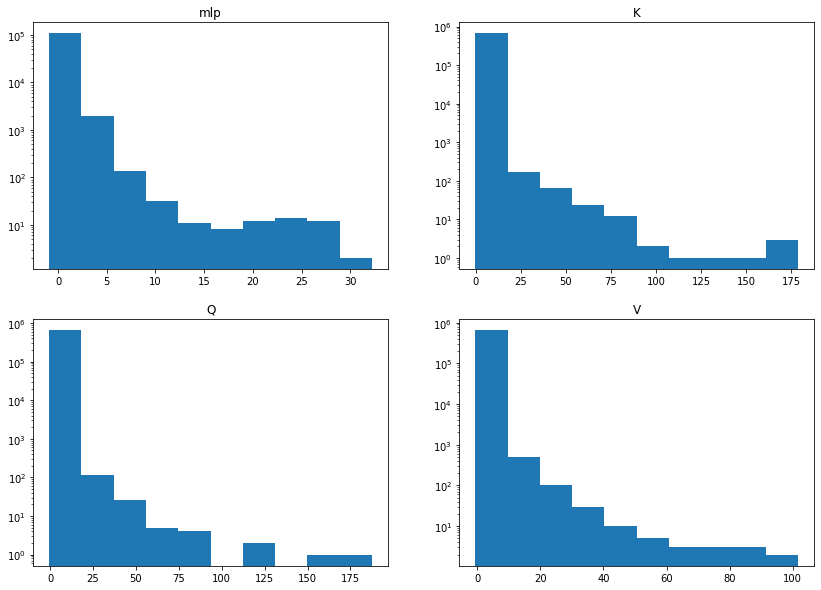

In [80]:
plt.figure(figsize=(14, 10))
bins=25

plt.subplot(2,2,1)
plt.yscale('log')
plt.title('mlp')
mlp = normalize(mlp_sorted['term_value'])
plt.hist(mlp, bins=bins)

plt.subplot(2,2,2)
plt.yscale('log')
plt.title('K')
mlp = normalize(K_sorted['term_value'])
plt.hist(K, bins=bins)

plt.subplot(2,2,3)
plt.yscale('log')
plt.title('Q')
mlp = normalize(Q_sorted['term_value'])
plt.hist(Q, bins=bins)

plt.subplot(2,2,4)
plt.yscale('log')
plt.title('V')
mlp = normalize(V_sorted['term_value'])
plt.hist(V, bins=bins)


plt.show()